In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\Chinmaya holla\\Desktop\\Airpollution\\Data\\Processed_data\\analysis_ready_data.csv")



Group by Station and calculate the Average AQI
We use 'mean' to find the long-term average behavior of each station

In [6]:
station_stats = df.groupby('Station')['PM2_5_AQI'].mean().sort_values(ascending=False).reset_index()

print("Average AQI by Station (Ranking):")
print(station_stats)

Average AQI by Station (Ranking):
           Station   PM2_5_AQI
0             RVCE  106.438243
1      BapujiNagar  106.177869
2  Kadabasenahalli   97.369092
3           Peenya   94.876260
4        Jayanagar   94.148605
5        Silkboard   90.739450
6              BTM   87.433150
7           Hebbal   85.857666
8       Hombegowda   77.285714


 3. Visualize the Hotspots

C:\Users\Chinmaya holla\AppData\Local\Temp\ipykernel_14712\2054874531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_stats, x='PM2_5_AQI', y='Station', palette='Reds_r')


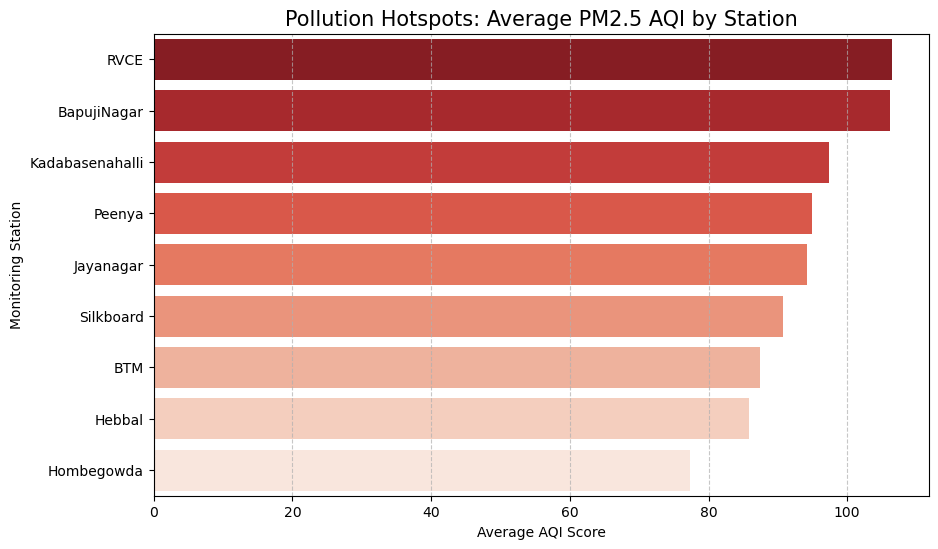

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=station_stats, x='PM2_5_AQI', y='Station', palette='Reds_r')
plt.title('Pollution Hotspots: Average PM2.5 AQI by Station', fontsize=15)
plt.xlabel('Average AQI Score')
plt.ylabel('Monitoring Station')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

                                  Analyze Seasonal Patterns (Objective 2b)
We need to prove that pollution changes with the seasons (Winter vs. Monsoon).
1. Convert Timestamp column to datetime (again, because CSV loses this info)
2. Extract the Month Name
3. Define the correct order for months (otherwise they sort Alphabetically)
4. Group by Month and calculate Average AQI

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],dayfirst=True)
df['Month'] = df['Timestamp'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend = df.groupby('Month')['PM2_5_AQI'].mean().reindex(month_order).reset_index()

Visualize the trend

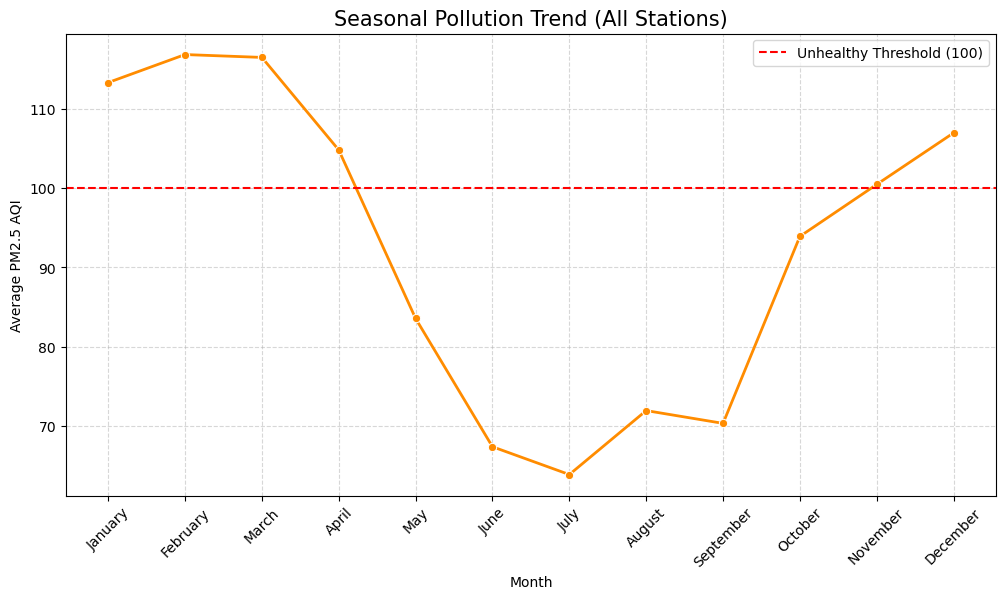

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Month', y='PM2_5_AQI', marker='o', color='darkorange', linewidth=2)
plt.title('Seasonal Pollution Trend (All Stations)', fontsize=15)
plt.ylabel('Average PM2.5 AQI')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)


plt.axhline(y=100, color='red', linestyle='--', label='Unhealthy Threshold (100)')
plt.legend()
plt.show()

What to look for:

You should see a "U-shape" curve.

High Pollution: Jan, Feb, Nov, Dec (Winter).

Low Pollution: June, July, Aug (Monsoon/Rain washes away pollution).

                          Correlation Analysis (Objective 2c)
We want to see if the stations are "synced up." If Peenya is polluted, is Jayanagar also polluted?

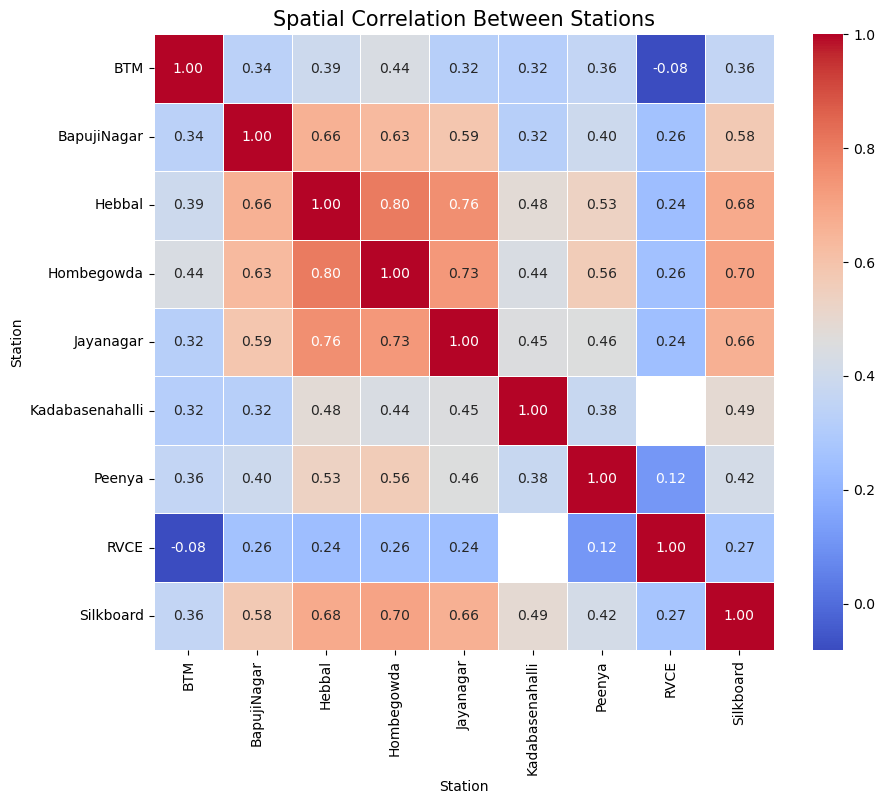

In [12]:
# 1. Pivot the data to get Stations as Columns
# Format: Index=Date, Columns=Stations, Values=AQI
df_pivot = df.pivot_table(index='Timestamp', columns='Station', values='PM2_5_AQI')

# 2. Calculate Correlation (0 to 1)
# 1.0 = Perfect sync
# 0.0 = No relationship
corr_matrix = df_pivot.corr()

# 3. Visualize with a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spatial Correlation Between Stations', fontsize=15)
plt.show()

What to look for:

Dark Red squares (0.8 - 0.9): These stations are very similar. They probably share the same air mass.

Lighter squares: These stations have different local pollution sources.

Yearly Average AQI:
   Year  PM2_5_AQI
0  2019  98.701857
1  2020  86.237311
2  2021  90.098829
3  2022  92.898095
4  2023  94.049073
5  2024  92.231611


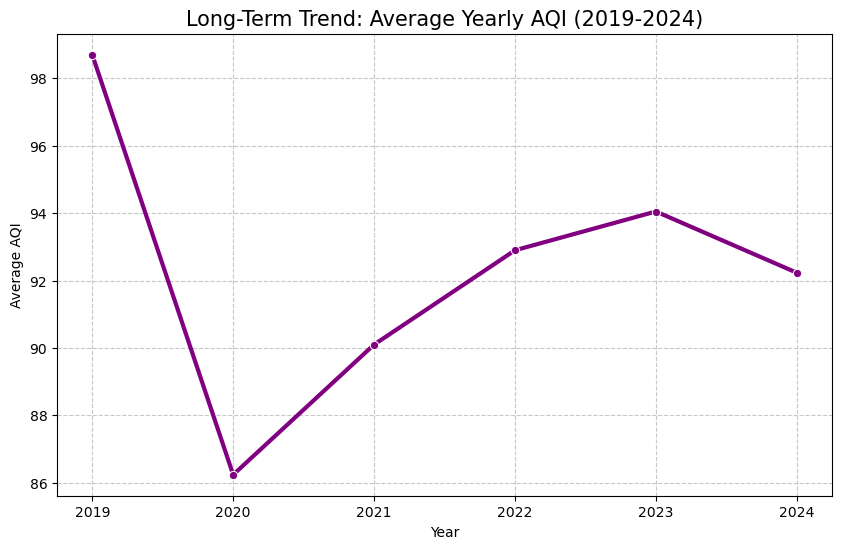

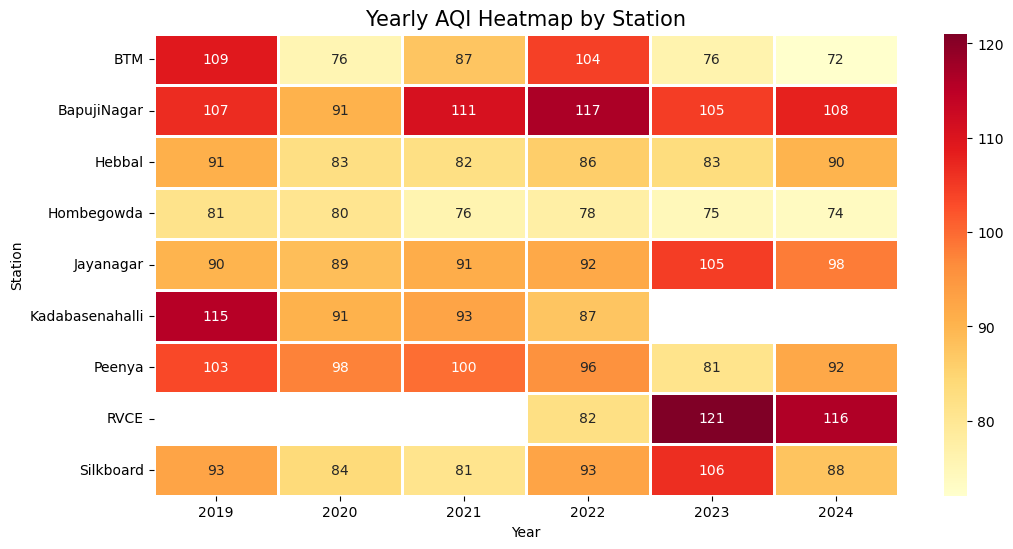

In [13]:
# --- YEARLY ANALYSIS ---

# 1. Extract Year from Timestamp
df['Year'] = df['Timestamp'].dt.year

# 2. Calculate Yearly Averages
yearly_avg = df.groupby('Year')['PM2_5_AQI'].mean().reset_index()
print("Yearly Average AQI:")
print(yearly_avg)

# 3. Plot the Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg, x='Year', y='PM2_5_AQI', marker='o', color='purple', linewidth=3)
plt.title('Long-Term Trend: Average Yearly AQI (2019-2024)', fontsize=15)
plt.ylabel('Average AQI')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(yearly_avg['Year']) # Force it to show every year
plt.show()

# 4. Station-wise Yearly Heatmap
# This shows us: "Which station was the worst in 2023?"
station_yearly = df.pivot_table(index='Station', columns='Year', values='PM2_5_AQI')

plt.figure(figsize=(12, 6))
sns.heatmap(station_yearly, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=1)
plt.title('Yearly AQI Heatmap by Station', fontsize=15)
plt.show()

The COVID Effect (2020): You will likely see a dip in 2020 due to the lockdowns. Pollution probably dropped significantly.

The "Rebound": Check 2021, 2022, and 2023. Did pollution go back up to 2019 levels? Or did it stay lower?

Station Changes: Look at the Heatmap. Did Peenya (Industrial) stay red (hot) every single year? Did RVCE (Residential) stay yellow (clean)? This confirms if your hotspots are "persistent" (Objective 2a).